In [1]:
import json
from banzhaf.BanzhafCircuit import DNFCircuit, convert_dnf
from banzhaf.FormulaCircuit import BooleanCircuit
from banzhaf.BooleanFormula import *
from banzhaf.Visualization import draw_dot

ModuleNotFoundError: No module named 'BanzhafEngine'

In [28]:
with open('ExampleData.json', 'r') as example_data:
    json_data = json.load(example_data)
example_dnf = json_data["DNF"]
example_factorized = json_data["Factorized"]

[('90924742-6eba-4bc4-b10d-2a6c10d5a0f3', 9006254359131092.0), ('712bb863-fbd8-4cef-a060-13d1ca59f102', 9006254359131092.0), ('38d18b7d-a298-447e-a5d5-66b58d4ec622', 894542850900.0), ('8dd6ddd3-f4f6-4425-8c2e-fd36f1ee4cd0', 833731420500.0), ('0e7953b5-5591-4e43-8bd4-e6bc8b9bb067', 812798622900.0), ('ee632a39-d813-4875-a788-6af712cde977', 802777643100.0), ('6204e984-af39-48b2-a0b2-9a0a7ea7ade7', 742842616500.0), ('49f79f66-aeb8-40a4-a832-95f418bb2e9c', 742641849900.0), ('01d74c4a-6cff-43e7-922e-700ebf611163', 734918807700.0), ('b31d9cdc-9c22-4c93-8042-f4cc8aa5ba84', 608140620900.0), ('aecb0501-06ed-4803-be32-44e1f6080c94', 566937365940.0), ('a7509b62-afd0-4aea-8add-3790c30c5f71', 566937365940.0), ('aee0d585-3e2d-4d92-8184-1d63da464e49', 555220032300.0), ('428915c7-eb0b-449f-b01b-b492adfbfe02', 555220032300.0), ('30e3e2c3-e5cd-493f-98b3-db2d0ba67fbe', 524301975900.0), ('9104fc03-1e2c-4076-a582-ffe4b7c43edd', 509586527700.0), ('833c0114-25f2-471f-8b33-56b40375655f', 447430675500.0), ('ca8

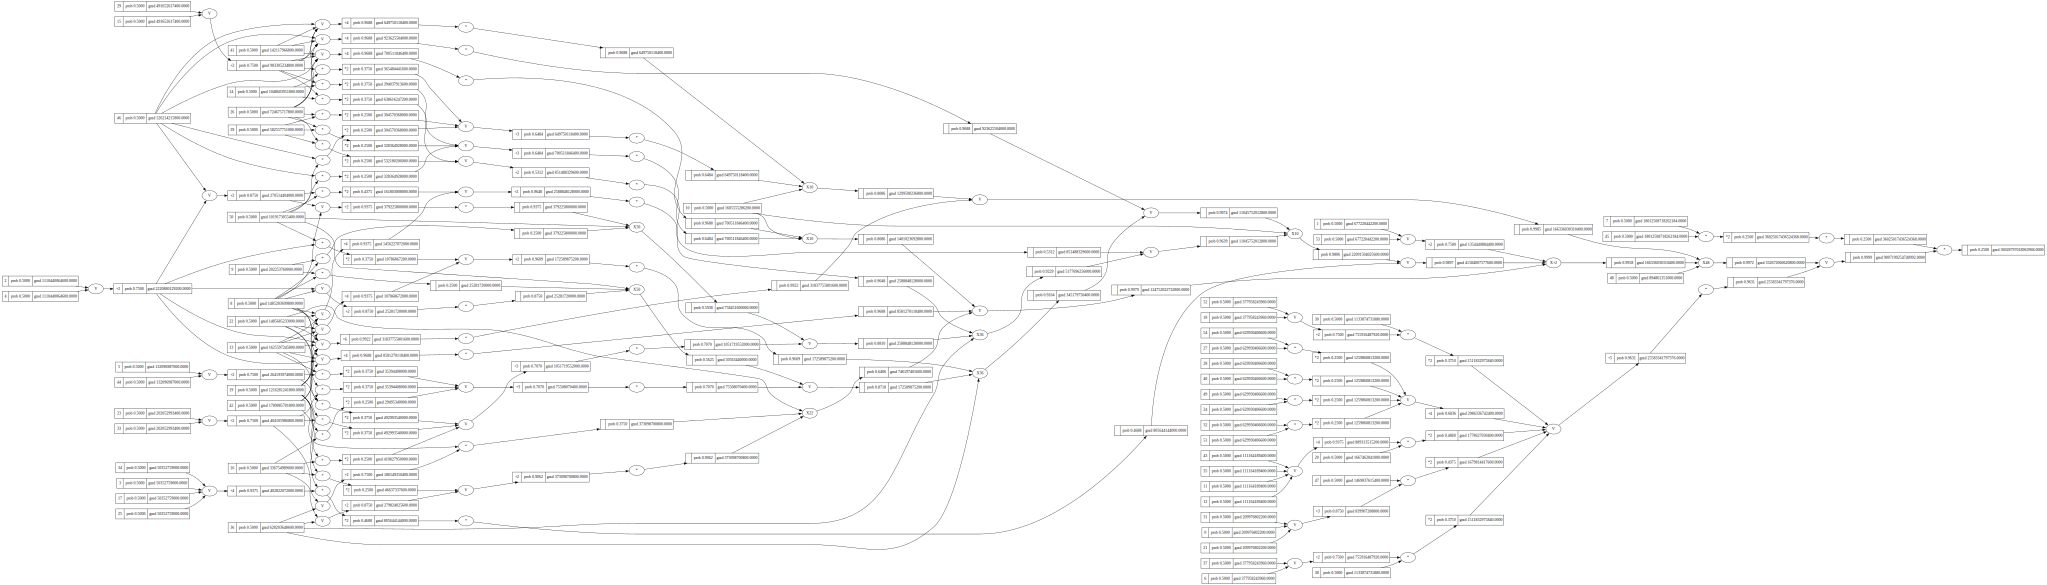

In [29]:
# Calculating Banzhf for the DNF data
dnf, var_map = convert_dnf(example_dnf)
circ_dnf = DNFCircuit(dnf)
var_map = {v:k for k,v in var_map.items()}
banzhaf_values_dnf = sorted([(var_map[int(k)], v) for k,v in circ_dnf.banzhaf_values], reverse=True, key=lambda x: (x[1], x[0]))
print(banzhaf_values_dnf)
draw_dot(circ_dnf.root.value)

[('90924742-6eba-4bc4-b10d-2a6c10d5a0f3', 9006254359131092.0), ('712bb863-fbd8-4cef-a060-13d1ca59f102', 9006254359131092.0), ('38d18b7d-a298-447e-a5d5-66b58d4ec622', 894542850900.0), ('8dd6ddd3-f4f6-4425-8c2e-fd36f1ee4cd0', 833731420500.0), ('0e7953b5-5591-4e43-8bd4-e6bc8b9bb067', 812798622900.0), ('ee632a39-d813-4875-a788-6af712cde977', 802777643100.0), ('6204e984-af39-48b2-a0b2-9a0a7ea7ade7', 742842616500.0), ('49f79f66-aeb8-40a4-a832-95f418bb2e9c', 742641849900.0), ('01d74c4a-6cff-43e7-922e-700ebf611163', 734918807700.0), ('b31d9cdc-9c22-4c93-8042-f4cc8aa5ba84', 608140620900.0), ('aecb0501-06ed-4803-be32-44e1f6080c94', 566937365940.0), ('a7509b62-afd0-4aea-8add-3790c30c5f71', 566937365940.0), ('aee0d585-3e2d-4d92-8184-1d63da464e49', 555220032300.0), ('428915c7-eb0b-449f-b01b-b492adfbfe02', 555220032300.0), ('30e3e2c3-e5cd-493f-98b3-db2d0ba67fbe', 524301975900.0), ('9104fc03-1e2c-4076-a582-ffe4b7c43edd', 509586527700.0), ('833c0114-25f2-471f-8b33-56b40375655f', 447430675500.0), ('ca8

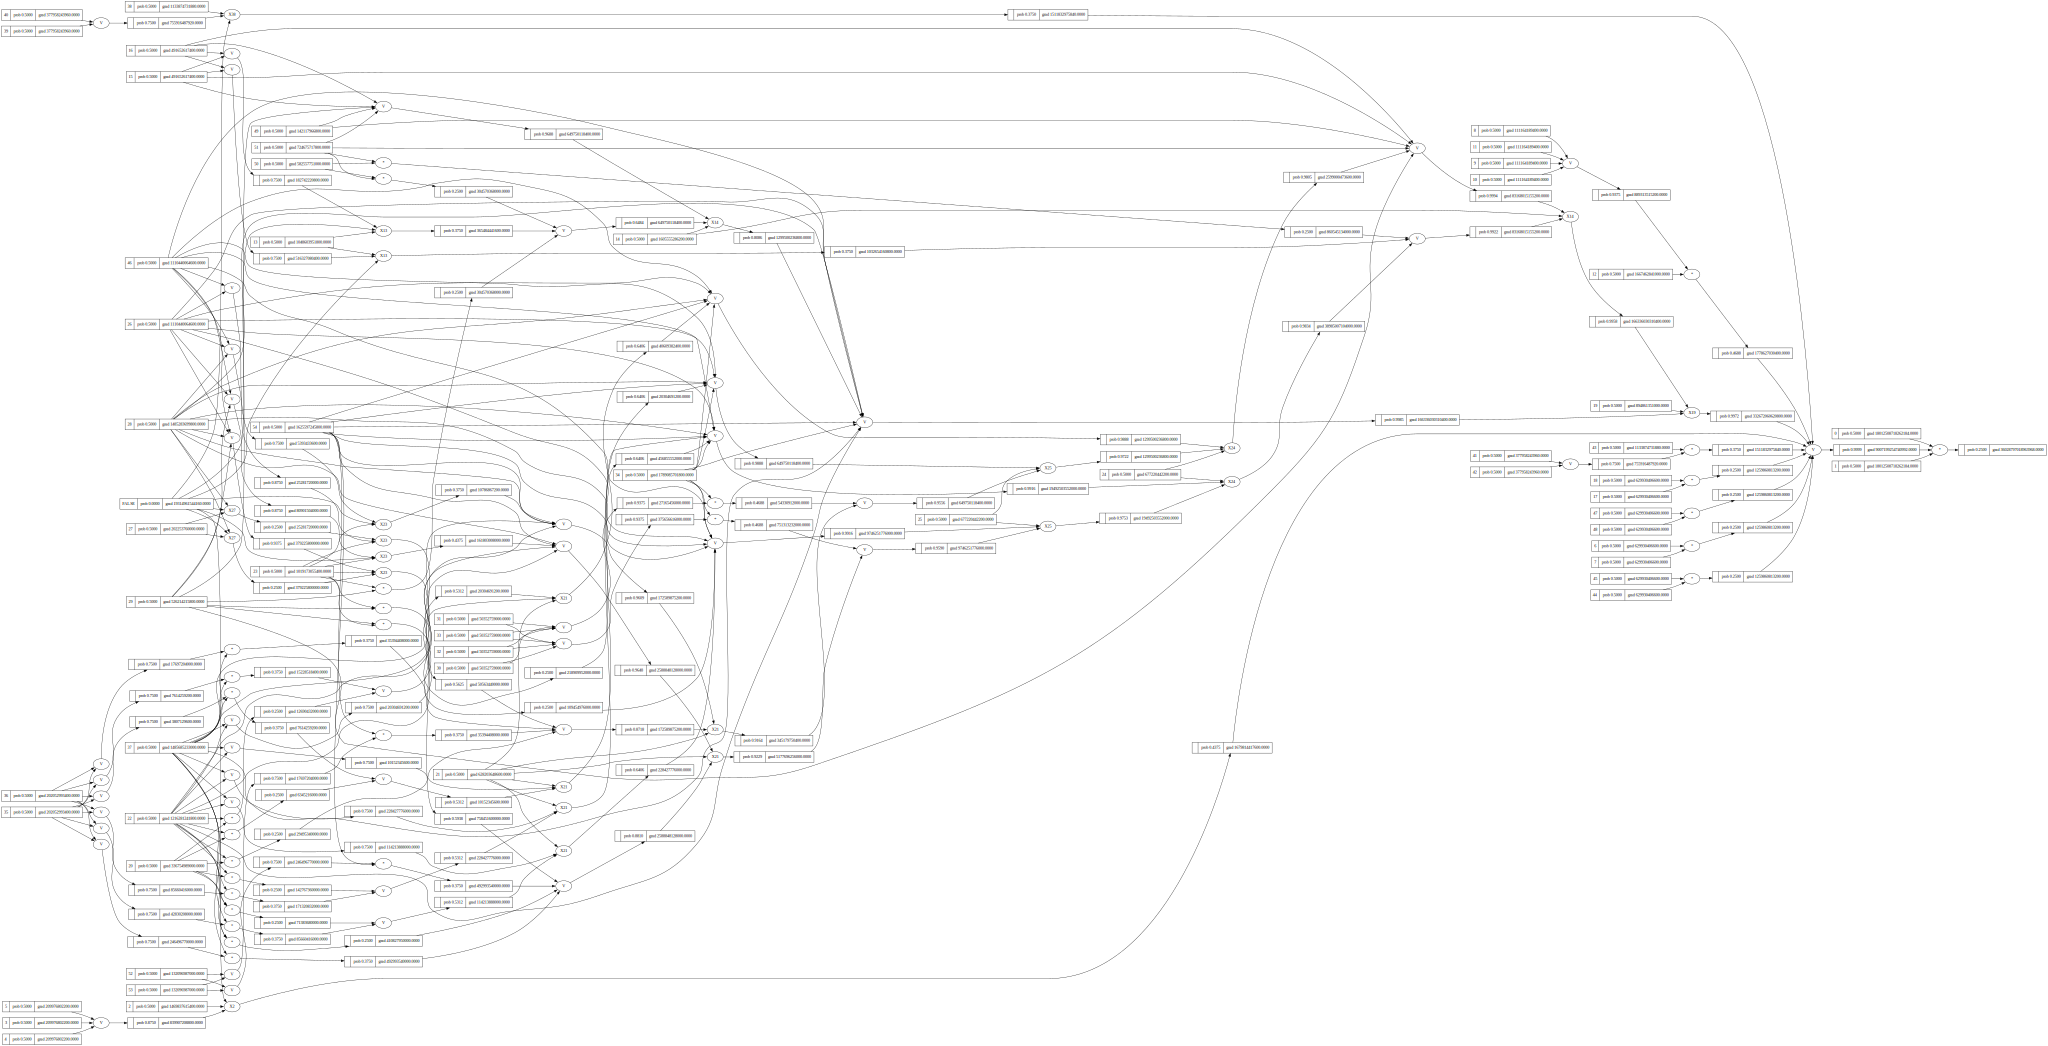

In [30]:
# Calculating Banzhaf for the factorized data
formula, var_map, _ = parse_formula(example_factorized)
circ_factorized = BooleanCircuit(formula)
var_map = {v:k for k,v in var_map.items()}
banzhaf_values_factorized = sorted([(var_map[int(k)], v) for k,v in circ_factorized.banzhaf_values], reverse=True, key=lambda x: (x[1], x[0]))
print(banzhaf_values_factorized)
draw_dot(circ_factorized.root.value)

In [31]:
# Sanity Check:
for idx, (k,v) in enumerate(banzhaf_values_dnf):
    if banzhaf_values_factorized[idx] != (k,v):
        print("Error, Banzhaf values don't match")
        exit(0)